### Import Packages

In [1]:
from PIL import Image
from tensorflow import keras;
import os;
import cv2;
import random;
import numpy as np;
import tensorflow as tf;
import matplotlib.pyplot as plt;
import matplotlib.image as mpimg

### Function Definitions

- `Data Cleaning`：Convert File Type
- `Data Preprocessing`：Resize、Gray Image 、Normalization、Standardization
- `Feature Engineering`：Face Detection、(NMS)、(GetContours)
- `Data Augmentation` ：Crop、Background Removal、Rotation、Flip、Noise、(Histogram Equalization)

In [31]:
'''define show image function'''
def ImgShow(image):
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # if image is not None:
    #     if image.dtype != 'uint8':
    #         image = image.astype('uint8')
    # IMG = plt.imshow(image)
    plt.imshow(image,cmap='gray')
    plt.show()
    # print(image.shape)
    # print("---------------------------------------------------------")

'''define resize image function'''
def ResizeImage(image, target_size):
    original_size = (image.shape[1], image.shape[0])
    scale_x = target_size[0] / original_size[0]
    scale_y = target_size[1] / original_size[1]
    resized_image = cv2.resize(image, (0, 0), fx=scale_x, fy=scale_y)
    resized_image = resized_image[:target_size[1], :target_size[0]]
    return resized_image

'''define gray image function'''
def GrayImage(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    return gray_image        

'''define normalize image function'''
def NormalizeImage(image):
    image = image.astype('float32')
    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return image

'''define standardize image function'''
def StandardizeImage(image):
    image = image.astype('float32')
    image = (image - np.mean(image)) / np.std(image)
    return image

'''define face detection function'''
def FaceDetection(image):
    # image = np.array(image, dtype='uint8')
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    scaleFactor = 1.02
    minNeighbors = 4
    faces = face_cascade.detectMultiScale(image, scaleFactor, minNeighbors)
    # for (x, y, w, h) in faces:
    #     cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # print("DebugLog:FaceDetection")
    return image,faces

'''define crop image function'''
def CropImage(image):
    _, faces = FaceDetection(image)
    # print("DebugLog:CropImage")
    if len(faces) > 0:
        x, y, w, h = faces[0]
        cropped_face = image[y:y+h, x:x+w]
        return cropped_face
    else:
        # print("No face detected.")
        return None

In [3]:
'''define noise image function'''
def NoisyImage(image,noise_typ):
    if noise_typ == "gauss":      
        row,col,ch= image.shape
        mean = 0
        var = 500
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.05
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                for i in image.shape]
        out[tuple(coords)] =1
        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                for i in image.shape]
        out[tuple(coords)] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy
    
'''define rotate image function'''
def RotateImage(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]
    # define rotation center
    if center is None:
        center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    image = cv2.warpAffine(image, M, (w, h))
    return image

'''define flip image function'''
def FlipImage(image, mode):
    if mode == 0:
        flipped = cv2.flip(image, 1)
    elif mode == 1:
        flipped = cv2.flip(image, 0)
    elif mode == 2:
        flipped = cv2.flip(image, -1)
    return flipped

### Function Testing

In [ ]:
# img = cv2.imread('./ReadTest/0002.jpg')
# img.shape
# ImgShow(img)

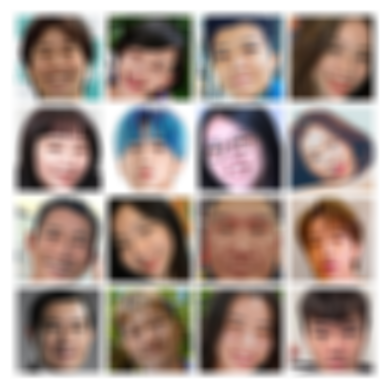

In [22]:
img = cv2.imread('./Presentation/1.jpg')

plt.axis('off')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.blur(image,(40,40))
plt.imshow(blur,cmap='gray')
plt.show()

### Main 

K_1.jpg


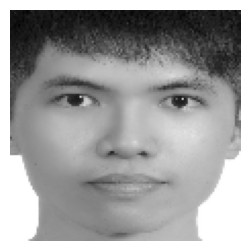

K_2.JPG


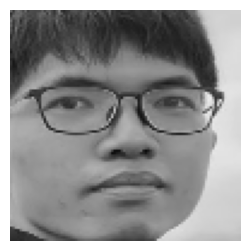

K_3.JPG


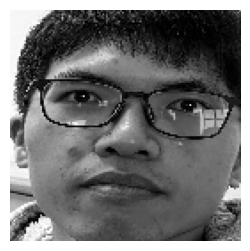

L_1.jpg


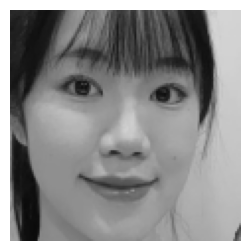

L_2.jpg


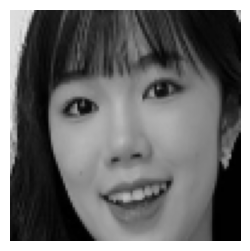

L_3.jpg


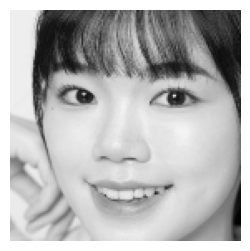

R_1.jpg


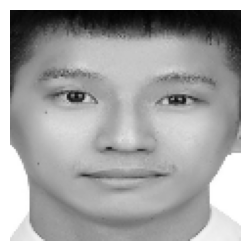

R_2.JPG


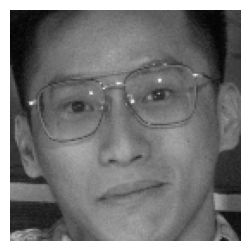

R_3.JPG


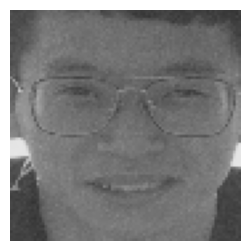

Totally process:9 images


In [37]:
imgList = []
def ReadImage(directoryName):
    target_size = (256, 256)
    total_faces = 0
    for filename in os.listdir(directoryName):
        img = cv2.imread(os.path.join(directoryName, filename))
        if img is None:
            print(f"Error reading image: {filename}")
            continue
        img = ResizeImage(img, target_size)
        img = GrayImage(img)
        
        img, _ = FaceDetection(img)
        _, faces = FaceDetection(img)
        total_faces += len(faces) 

        cropped_face = CropImage(img)
        if cropped_face is not None:
            if cropped_face.shape[0] > 80 or cropped_face.shape[1] > 80:
                img = cropped_face
                imgList.append(img)
                print(filename)
        ImgShow(img)

ReadImage("../Image/test/RawData")
print(f"Totally process:{len(imgList)} images")

### Save Results

In [15]:
'''define save image function'''
def SaveImage(directoryName):
    for i, img in enumerate(imgList):
        filename = f"Preprocessed_{i+1:03d}.jpg"  
        # print(filename)
        cv2.imwrite(os.path.join(directoryName, filename), img)

# SaveImage("../Image/test/P_3")